In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data1 = pd.read_excel('/content/drive/MyDrive/COLAB FILE - PMAPS /DATA/AL-Mg alloy/Al-0.1Mg.xlsx')
data2= data1.copy()
data2 = pd.DataFrame(data1)

np.set_printoptions(suppress=True)
data2.dropna()
d1s1= data2.iloc[0:6,2:]
d1s1.dropna()
temp= np.arange(300,600,50)
print('temperature={}'.format(temp))
matrixstrain1 = d1s1.to_numpy(dtype= 'float32',copy=True)
print(matrixstrain1,'\n')

sr= data1.iloc[:6,1]
sr=sr.to_numpy()
print("strain rate={}".format(sr),"\n")

np.prod(matrixstrain1.shape)
data2.head(5)

temperature=[300 350 400 450 500 550]
[[16.1   8.87  5.3   4.1   2.2   1.52]
 [18.5  14.1   9.5   7.7   5.3   3.42]
 [23.5  19.   13.6  10.9   8.1   6.2 ]
 [30.4  23.   17.8  15.7  11.5   9.7 ]
 [33.2  31.   25.9  20.3  15.8  13.7 ]
 [42.8  36.1  31.5  26.4  22.   19.3 ]] 

strain rate=[  0.001   0.01    0.1     1.     10.    100.   ] 



,Strain,Strain Rate,300,350,400,450,500,550
0,0.1,0.001,16.1,8.87,5.3,4.1,2.2,1.52
1,0.1,0.010,18.5,14.10,9.5,7.7,5.3,3.42
2,0.1,0.100,23.5,19.00,13.6,10.9,8.1,6.20
3,0.1,1.000,30.4,23.00,17.8,15.7,11.5,9.70
4,0.1,10.000,33.2,31.00,25.9,20.3,15.8,13.70


In [ ]:
from scipy import  interpolate
f = interpolate.interp2d(temp,np.log10(sr),matrixstrain1,kind='cubic') 

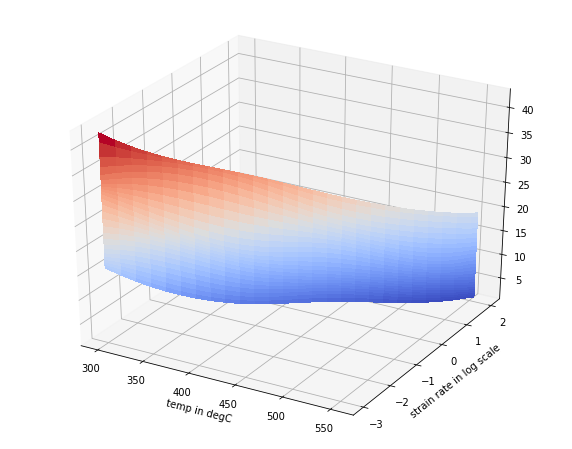

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig= plt.figure(figsize= (10,8))
ax= fig.add_subplot(111,projection= '3d')
tnew = np.arange(300, 560, 5)
srnew = np.linspace(-3,2,len(tnew),endpoint=True)
znew = f(tnew, srnew)
ax.plot_surface(tnew,srnew,znew,rstride=2,cstride=2,cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
plt.xlabel('temp in degC')
plt.ylabel('strain rate in log scale')
plt.show()

In [ ]:
temp_col_to_row = matrixstrain1.transpose()
temp_col_to_row

array([[16.1 , 18.5 , 23.5 , 30.4 , 33.2 , 42.8 ],
       [ 8.87, 14.1 , 19.  , 23.  , 31.  , 36.1 ],
       [ 5.3 ,  9.5 , 13.6 , 17.8 , 25.9 , 31.5 ],
       [ 4.1 ,  7.7 , 10.9 , 15.7 , 20.3 , 26.4 ],
       [ 2.2 ,  5.3 ,  8.1 , 11.5 , 15.8 , 22.  ],
       [ 1.52,  3.42,  6.2 ,  9.7 , 13.7 , 19.3 ]], dtype=float32)

**cubic interpolation 1d temperature wise**

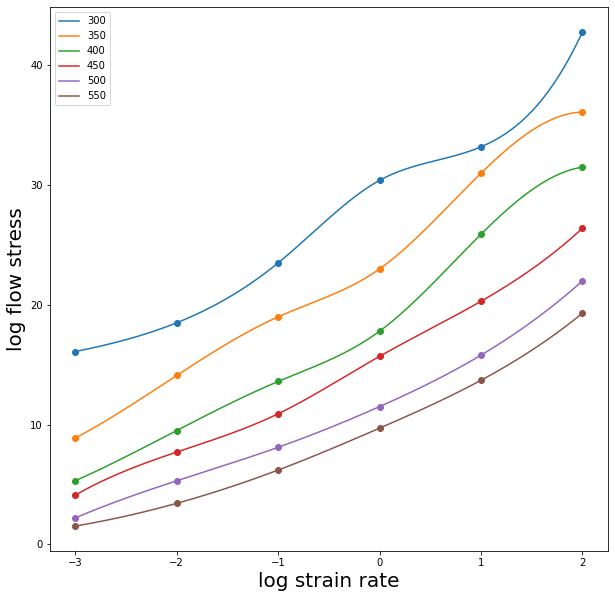

In [ ]:
from numpy.lib import stride_tricks
from scipy.interpolate import CubicSpline
dsr = 0.01
sri = np.arange(-3, 2.01, dsr)
cs_stressmatrix = []
fig,axes= plt.subplots(figsize=(10, 10))


for i in temp_col_to_row:
  cs= CubicSpline(np.log10(sr),i)
  axes.plot(sri,cs(sri))
  axes.scatter(np.log10(sr), i)
  cs_stressmatrix.append(cs(sri))

axes.legend(temp)
plt.xlabel('log strain rate', fontsize=20)
plt.ylabel('log flow stress', fontsize=20)
cs_stressmatrix =np.array(cs_stressmatrix)